In [1]:
library(ggplot2)
run <- read.csv("run.csv", header = T)
steps <- read.csv("step.csv", header = T)

In [2]:
head(run)

cohort,status,cost,runtime,runhrs,seqcenter
seidman2016,COMPLETED,31.84,114852,31.90333,broad
seidman2016,COMPLETED,32.29,115240,32.01111,broad
seidman2016,COMPLETED,28.74,101861,28.29472,broad
seidman2016,COMPLETED,30.18,112355,31.20972,broad
seidman2016,COMPLETED,29.58,107476,29.85444,broad
seidman2016,COMPLETED,30.53,106385,29.55139,broad


# Overview Summary

In [3]:
table(run$cohort)
# samples per cohort


 marazita2015  marazita2016     maris2016      rios2016 schiffman2015 
           45            44            44            45            45 
  seidman2016 
           45 

In [4]:
table(run$status)
# COMPLETED vs FAILED


COMPLETED    FAILED 
      262         6 

In [5]:
summary(run$runhrs)
# run time summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  7.849  27.600  31.380  33.260  38.510  63.270 

In [6]:
summary(run$cost)
# compute cost summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.24   28.93   32.92   36.28   37.80  122.50 

# Compute Cost

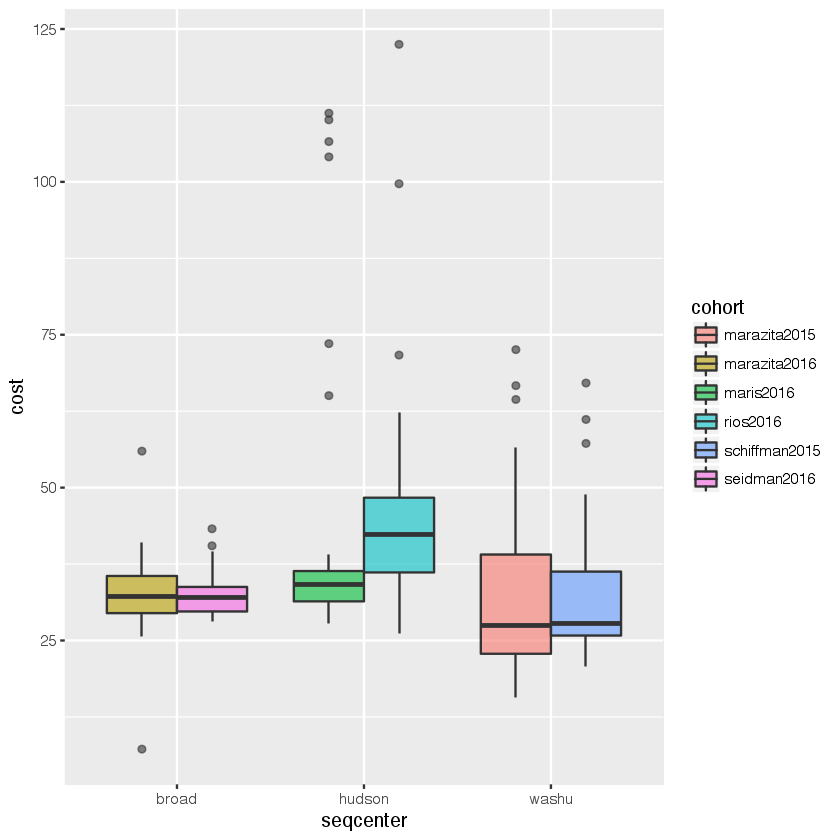

In [7]:
ggplot(run, aes(seqcenter, cost)) + 
  geom_boxplot(aes(fill=cohort), alpha=.6)

In [8]:
summary(subset(run, seqcenter != 'hudson')$cost)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.24   26.83   30.80   32.62   35.90   72.57 

In [9]:
summary(subset(run, seqcenter != 'hudson')$runhrs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  7.849  25.830  28.640  28.650  31.410  55.230 

# Run Time

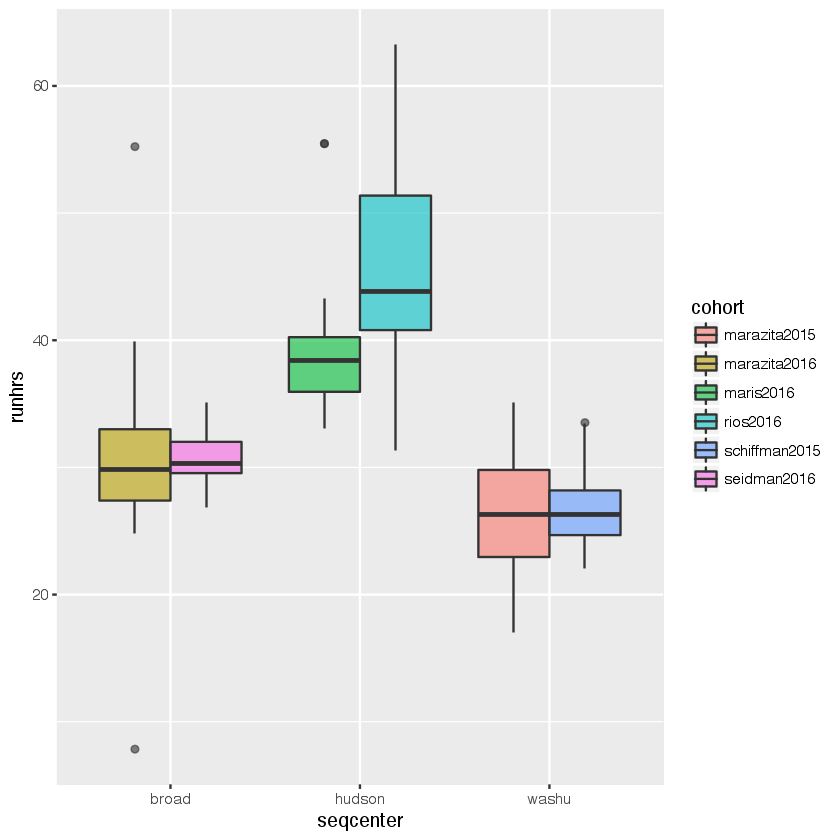

In [10]:
ggplot(run, aes(seqcenter, runhrs)) + 
  geom_boxplot(aes(fill=cohort), alpha=.6)

## time-cost scatter

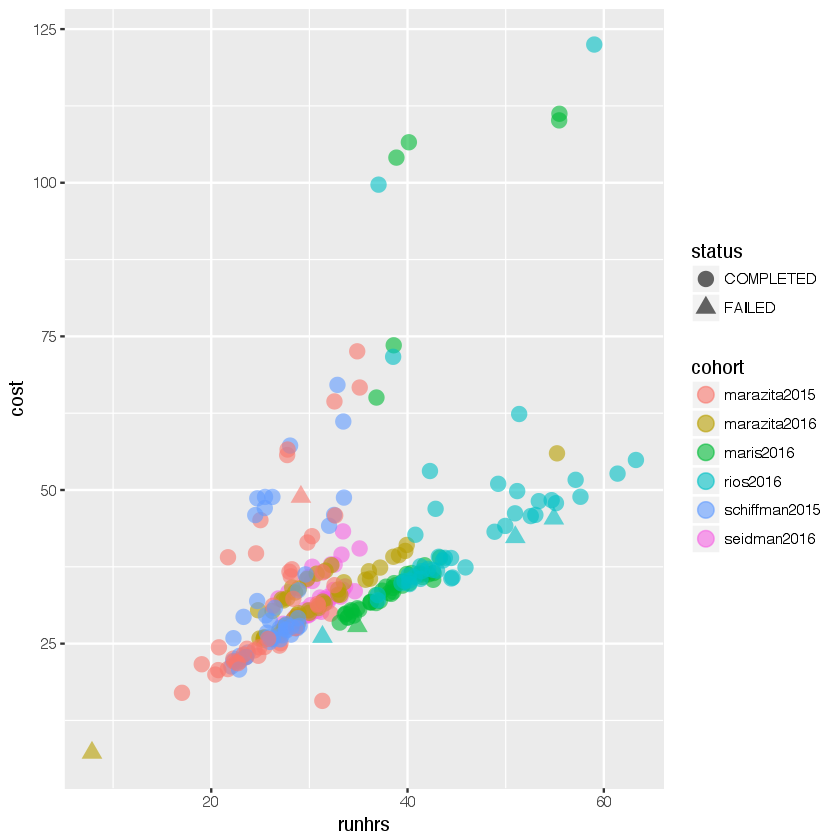

In [11]:
ggplot(run, aes(runhrs, cost, color=cohort, shape=status)) + 
  geom_point(size=4, alpha=.6)

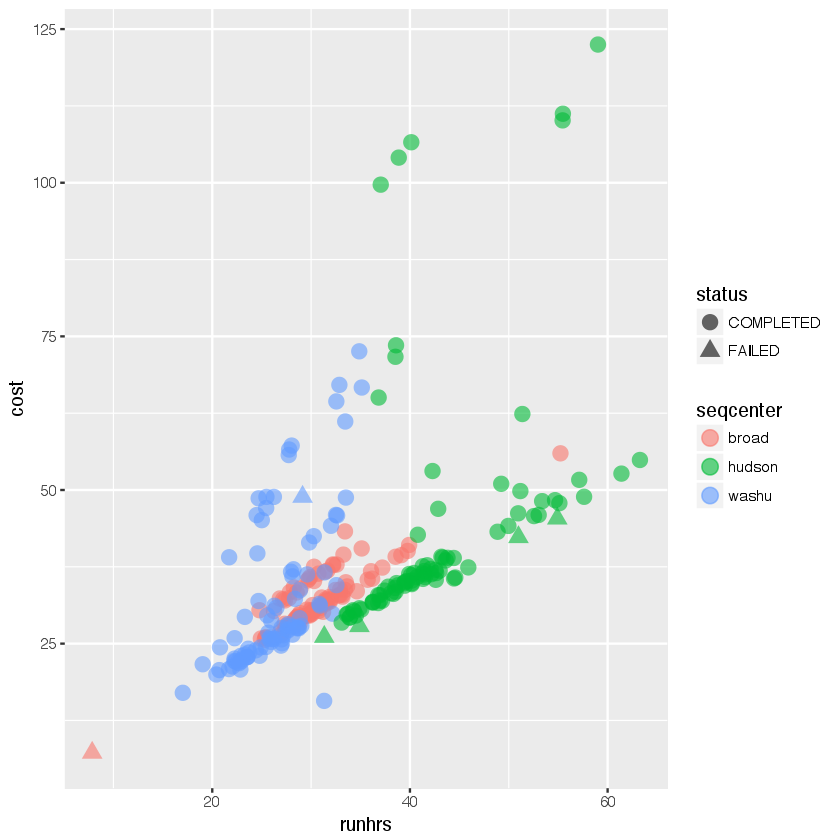

In [15]:
ggplot(run, aes(runhrs, cost, color=seqcenter, shape=status)) + 
  geom_point(size=4, alpha=.6)

# CWL Steps Break-down

In [12]:
head(steps)

task,cohort,seqcenter,step,time
1,seidman2016,broad,picard_collectreadgroupbamqualitymetrics,7417
1,seidman2016,broad,picard_collectqualityyieldmetrics,349
1,seidman2016,broad,gatk_haplotypecaller,11705
1,seidman2016,broad,getbasename,31
1,seidman2016,broad,samtools_coverttocram,7409
1,seidman2016,broad,picard_sortsam,12783


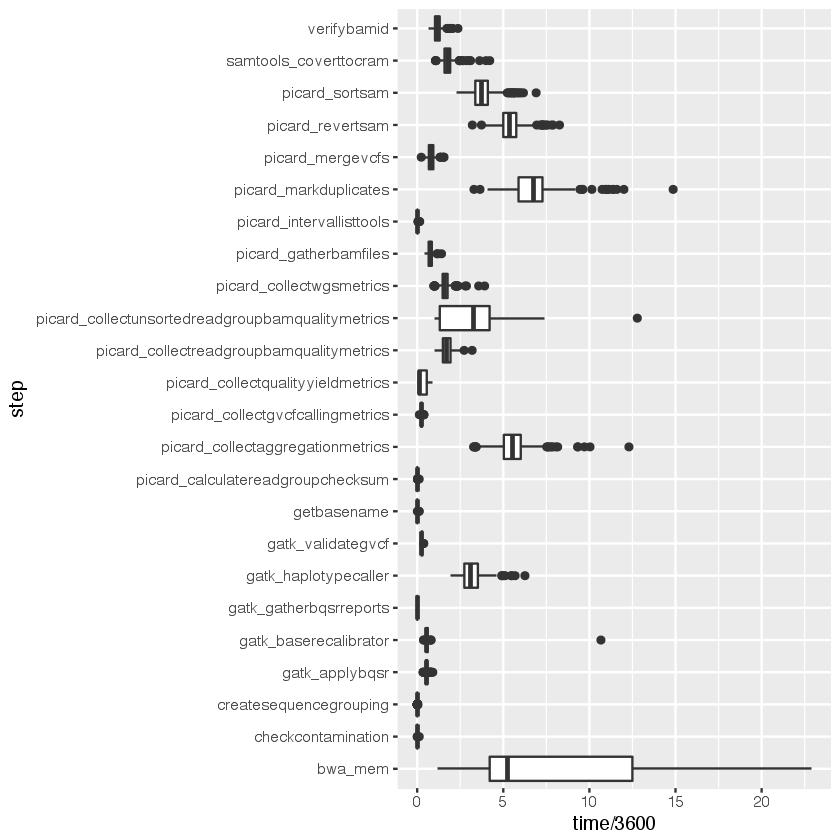

In [16]:
ggplot(steps, aes(step, time/3600)) + geom_boxplot() + coord_flip()

In [13]:
avg_time <- aggregate(steps[, 5], list(steps$step), mean)
colnames(avg_time)  <- c('step', 'time')
avg_time$time <- avg_time$time/3600
avg_time

step,time
bwa_mem,7.796212892
checkcontamination,0.009206955
createsequencegrouping,0.009095632
gatk_applybqsr,0.550063613
gatk_baserecalibrator,0.601009330
gatk_gatherbqsrreports,0.008964165
gatk_haplotypecaller,3.158067218
gatk_validategvcf,0.277362171
getbasename,0.009578032
picard_calculatereadgroupchecksum,0.011382528


# Expensive Steps

In [14]:
avg_time[avg_time$time>1.5,]
expstep <- avg_time[avg_time$time>1.5,]$step

,step,time
1,bwa_mem,7.796213
7,gatk_haplotypecaller,3.158067
11,picard_collectaggregationmetrics,5.572137
14,picard_collectreadgroupbamqualitymetrics,1.724118
15,picard_collectunsortedreadgroupbamqualitymetrics,3.147854
16,picard_collectwgsmetrics,1.625351
19,picard_markduplicates,6.759990
21,picard_revertsam,5.426554
22,picard_sortsam,3.856758
23,samtools_coverttocram,1.791954


In [15]:
expdf <- subset(steps, step %in% expstep)

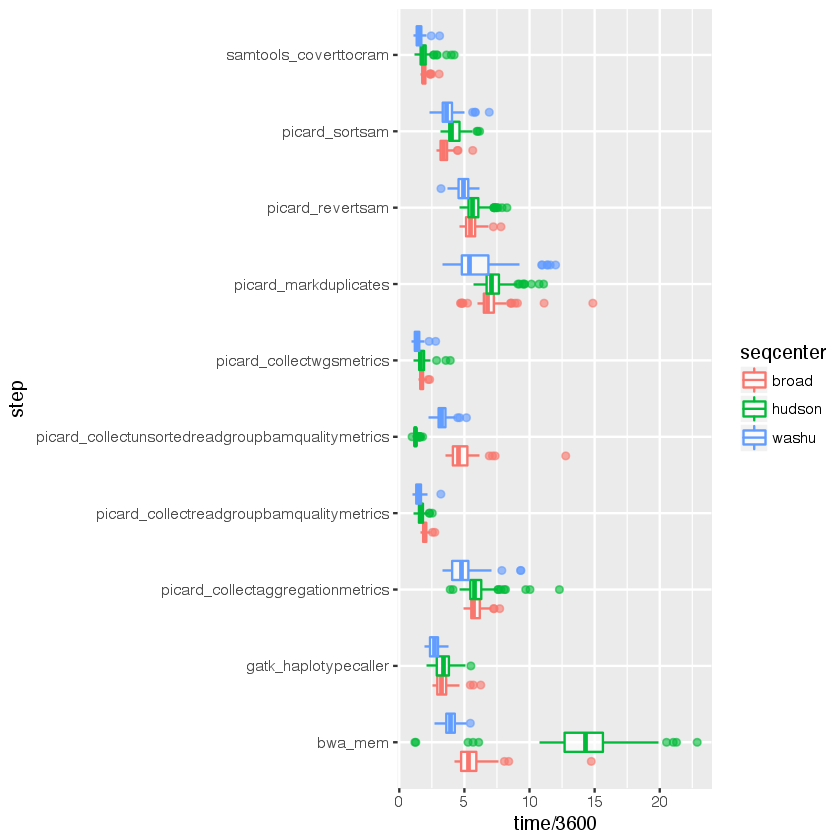

In [16]:
ggplot(expdf, aes(step, time/3600)) + 
    geom_boxplot(aes(color=seqcenter), alpha=.6) + coord_flip()